In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special
from scipy import integrate
from scipy.integrate import quad
import math

# 1-d example

In [66]:
# Inputs
print('Enter initial conditions:')
t0 = float(input('t0 = ')) ### 0
x0 = float(input('x0 = ')) ### 0

print('Enter calculation point: ')
tn = float(input('tn = ')) ### 10

print('Enter number of steps:')
n_step = int(input('Number of steps = ')) ### 100

Enter initial conditions:
t0 = 0
x0 = 0
Enter calculation point: 
tn = 10
Enter number of steps:
Number of steps = 100


In [90]:
w_p = 1
w_e = 0

#def s_func(t):
#    return s
def first(t, s, x_t):
    #x_t = x_T[t
    return (x_t - s)**2
def second(u):
    return u**2

def cost(w_p, w_e, s, x_target, times, u_arr):
    return w_p*1/2*scipy.integrate.simps(first(times, s, x_target), times)+w_e*1/2*scipy.integrate.simps(second(u_arr))

In [76]:

#model function
def dx_dt(x,u):
    #return x+u
    return np.exp(-(x**2)/2)+u

In [59]:
# Euler method
def euler(f,x0,y0,xn,n,u):
    
    # Calculating step size
    h = (xn-x0)/n
    
    s = np.zeros(n+1)
    
    #slope = f(y0, u[0])
    #s[0] = y0 + h * slope    ### This or s[0] = y0?
    s[0] = y0 
    
    times = np.arange(0, xn+h, h)
    
    #print('\n-----------SOLUTION-----------')
    #print('------------------------------')    
    #print('x0\ty0\tslope\tyn')
    #print('------------------------------')
    for i in range(n):
        slope = f(s[i], u[i+1])
        yn = y0 + h * slope
        s[i+1] = yn
        #print('%.4f\t%.4f\t%0.4f\t%.4f'% (x0,y0,slope,yn) )
        #print('------------------------------')
        #y0 = yn
        #x0 = x0+h
    
    #print('\nAt x=%.4f, y=%.4f' %(xn,yn))
    return s


In [77]:
def d_x_h(x):
    #return 1
    return -np.exp((-x**2)/2)*x

def d_xdot_h(x):
    return -1
    #return -np.exp((-x**2)/2)*x
    
def d_x_f(w_p,x,x_target):
    return w_p*(x-x_target)

def lambda_def(x,x_target, lambd, t, w_p):
    return (d_x_f(w_p,x[t],x_target[t])+lambd[t]*d_x_h(x[t]))/d_xdot_h(x[t])

# Euler method
def euler_backwards(x,x_target, lambd, step,n,w_p):

    for i in range(n-1,-1,-1):
        lambd[i] = lambd[i+1]-step*lambda_def(x,x_target, lambd, i,w_p) ###should it be i+1???
    return lambd


In [38]:
def d_u_f(w_e, u):
    return w_e*u
def d_u_h(u):
    return 1

def grad_f(w_e, u, lambdas):
    return d_u_f(w_e, u)+lambdas*d_u_h(u)

In [89]:
def bisection(f, w_p, w_e, s, x_target, times,u_arr, step_size, grad, t0,x0,tn,n_step):
    cost_temp = 10**12
    while step_size > 0.000001:
        u = u_arr-step_size*grad
        
        test = euler(f,t0,x0,tn,n_step,u)
        c = cost(w_p, w_e, s, x_target, times, u_arr)
       
        if(c<cost_temp):
            #plt.plot(times,test, "k")
            #plt.plot(times,x_target, "b")
            #plt.plot(times,u, "r")
            #plt.show()
            step_size = step_size/2
            cost_temp = c
        else:
            return step_size
    return 0

def optimal_control(f, w_p, w_e, t0,x0,tn,n_step,x_target):
    
    h = (tn-t0)/n_step
    times = np.arange(0, tn+h, h)
    #print(times)
    u_arr = np.zeros(len(times))  
    for l in range(500):
        s = euler(f,t0,x0,tn,n_step,u_arr)
        #x_T_arr = x_T(times)
        lambd = np.zeros(n_step+1)
        lambdas = euler_backwards(s,x_target,lambd,h,n_step,w_p)
        grad = grad_f(w_e, u_arr, lambdas)
        #plt.plot(times, grad, 'k', label='output')
        #plt.show()
        
        step_size = 5
        adj_step_size = bisection(f, w_p, w_e, s, x_target, times,u_arr, step_size, grad, t0,x0,tn,n_step)
        
        u_arr = u_arr-adj_step_size*grad
        
        if((l%25)==0):
            print(cost(w_p, w_e, s, x_target, times,u_arr))
            plt.figure(figsize = (10, 6))
            plt.plot(times, s, 'k', label='output')
            plt.plot(times, x_target, 'b', label='target')
            plt.plot(times, u_arr, 'r', label='control')
            plt.legend()
            plt.show()

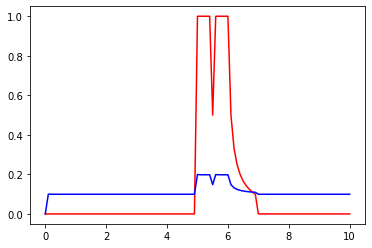

In [91]:
h = (tn-t0)/n_step
times = np.arange(0, tn+h, h)
#u_arr = u(times)
u_arr = np.zeros(len(times))
u_arr[50:60]=1
u_arr[55]=0.5 
for i in range(10):
    u_arr[60+i]=1/(i+1)

x_target = euler(dx_dt,t0,x0,tn,n_step,u_arr)
#times = np.arange(0, xn+h, h)
plt.plot(times, u_arr, "r")
plt.plot(times, x_target, "b")

0.004995889951257591


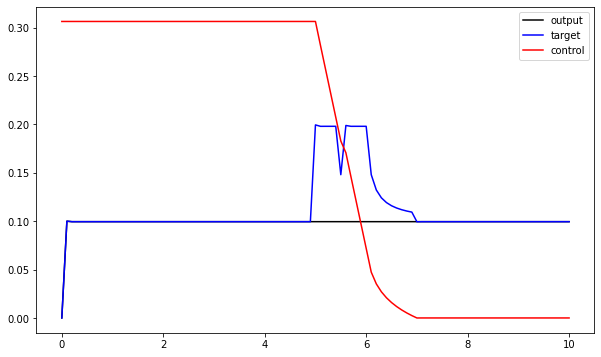

0.0028169678374059823


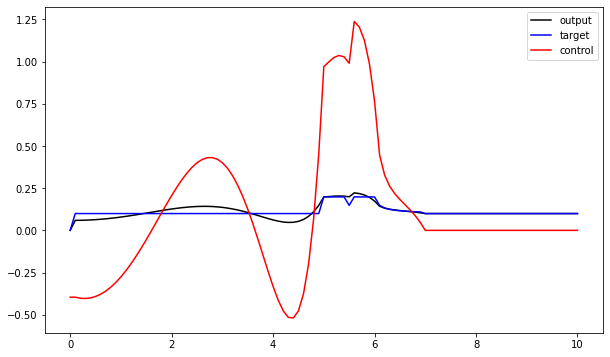

0.0011586378501458965


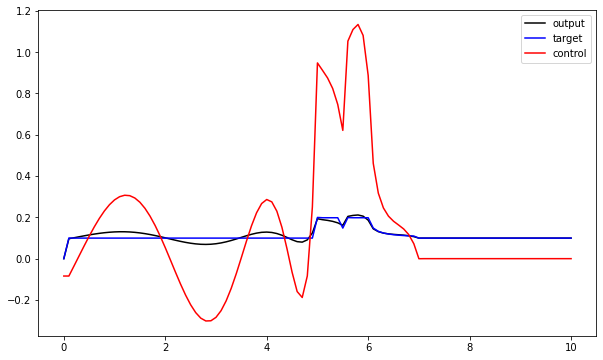

0.00048378702769991274


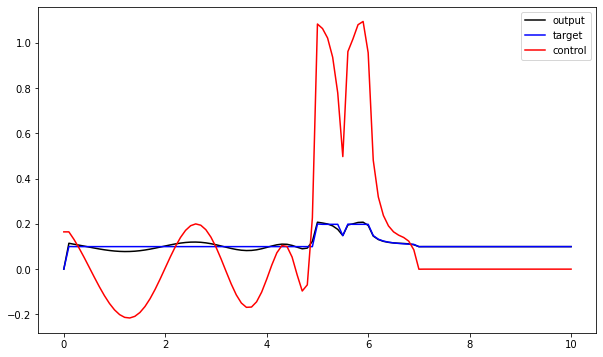

0.00020875036650068582


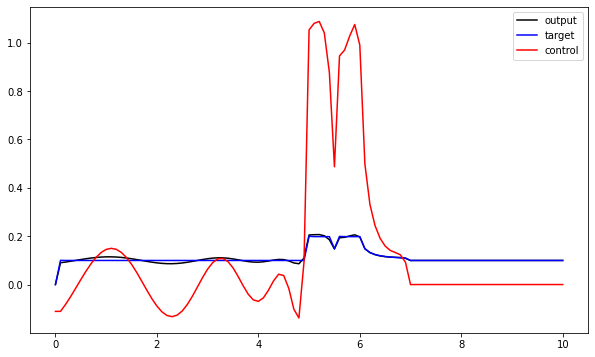

9.257260233402776e-05


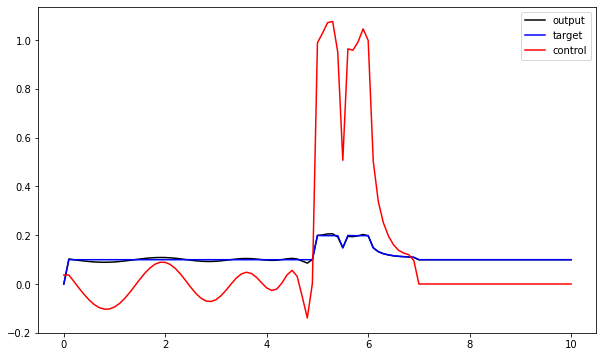

4.510029042842523e-05


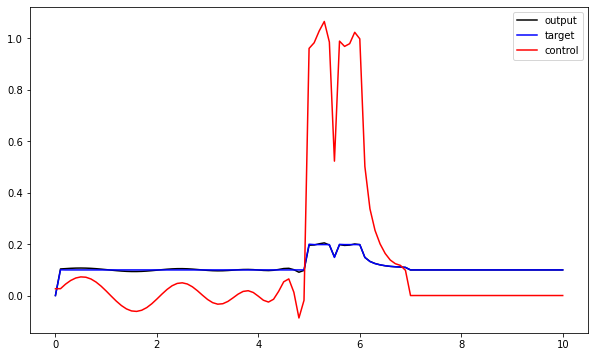

2.1327662822683774e-05


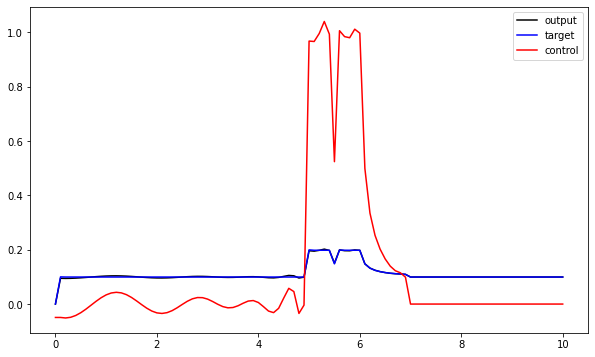

9.162053023496797e-06


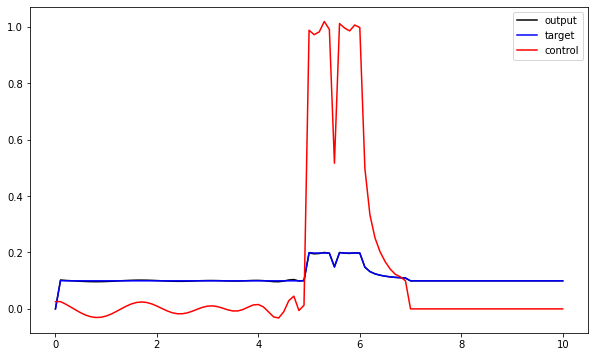

4.648297569964975e-06


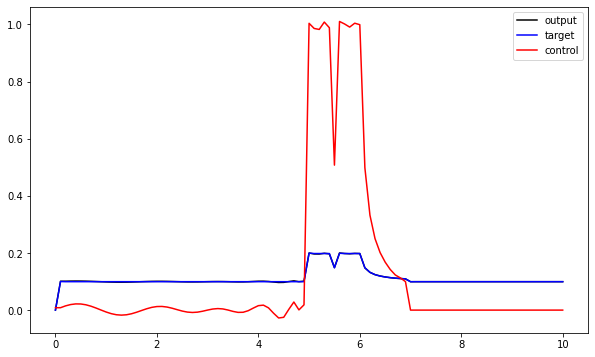

2.166539835322235e-06


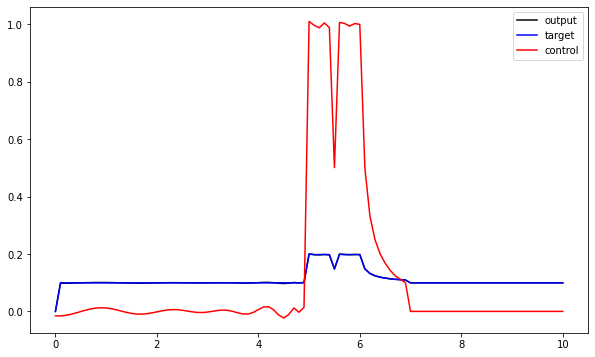

9.977754616044031e-07


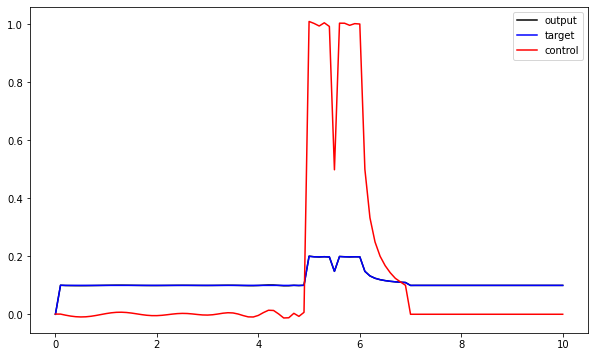

5.110362117960831e-07


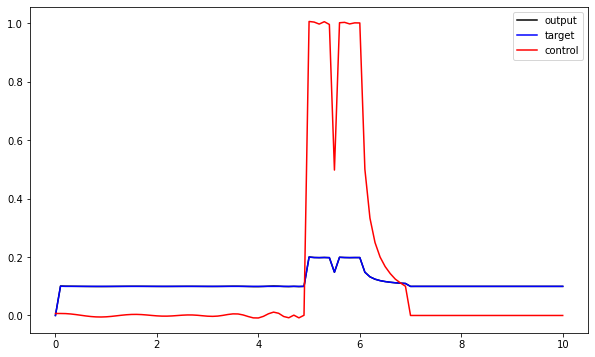

2.5234841871374367e-07


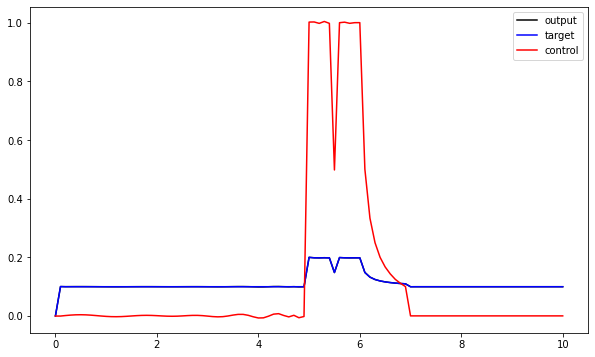

1.3868304822937992e-07


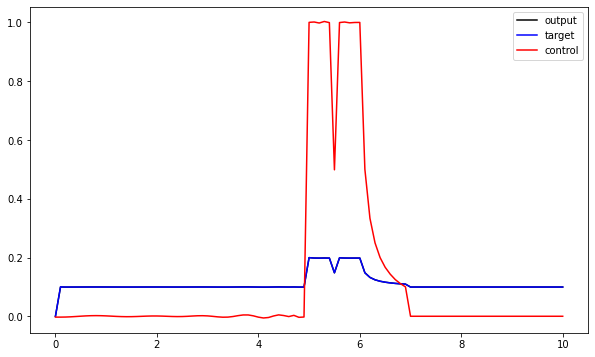

7.307227370746557e-08


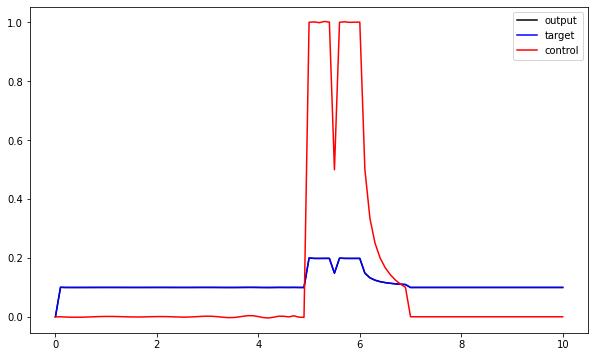

3.917110448581022e-08


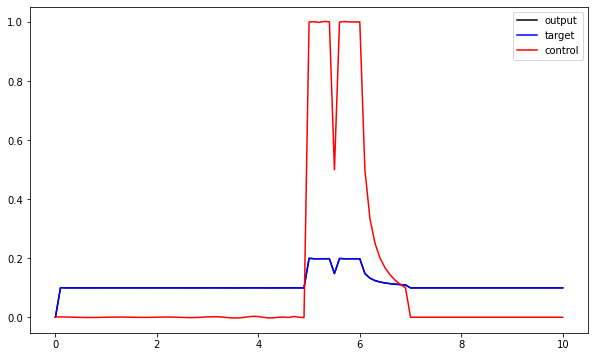

2.0666458445672455e-08


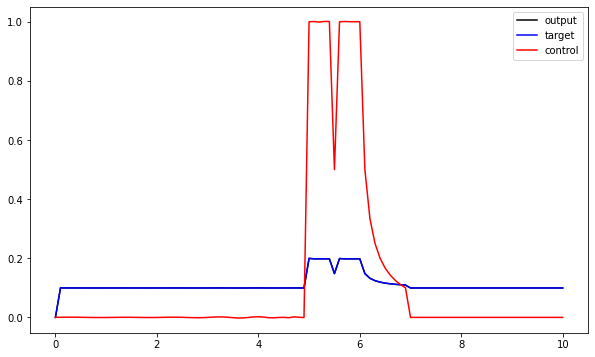

1.0789450522379664e-08


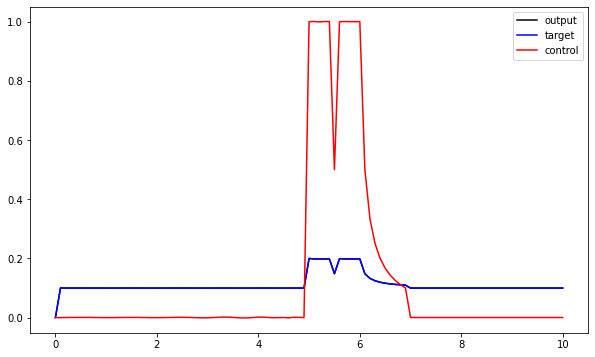

5.827957648802203e-09


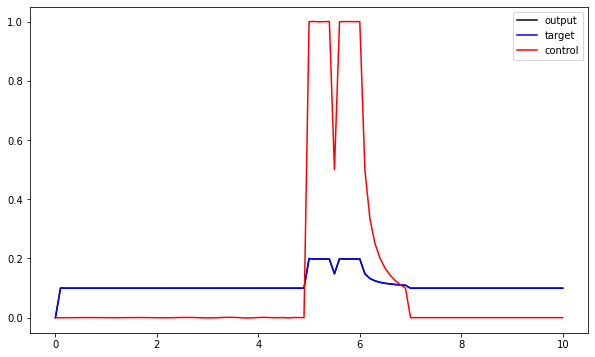

In [92]:
optimal_control(dx_dt,w_p,w_e,t0,x0,tn,n_step,x_target)

# Drafts

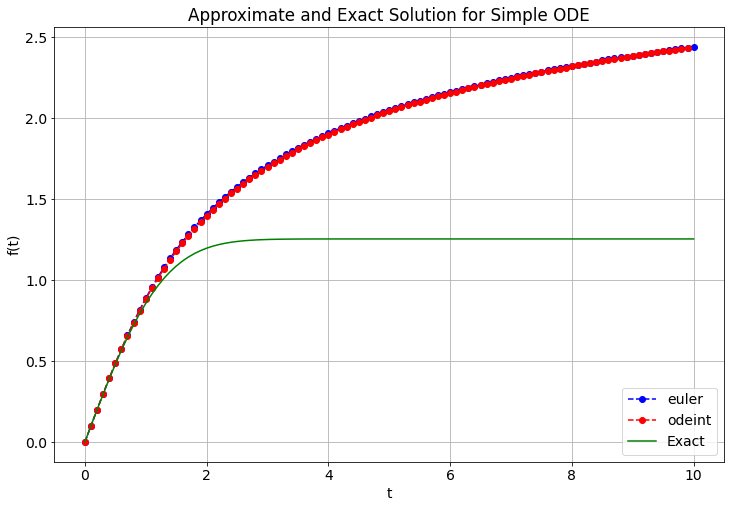

TypeError: cost() missing 1 required positional argument: 'times'

In [178]:
t = np.arange(0, xn+h, h)
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='euler')
plt.plot(t[:-1], xs, 'ro--', label='odeint')
#np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2))
#np.sqrt(np.pi/2)*scipy.special.erf(t)
plt.plot(t, x_T(t), 'g', label='Exact')
#plt.plot(t, 1 / (1 + np.exp(-t*100)), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

cost(w_p, w_e, s, t)

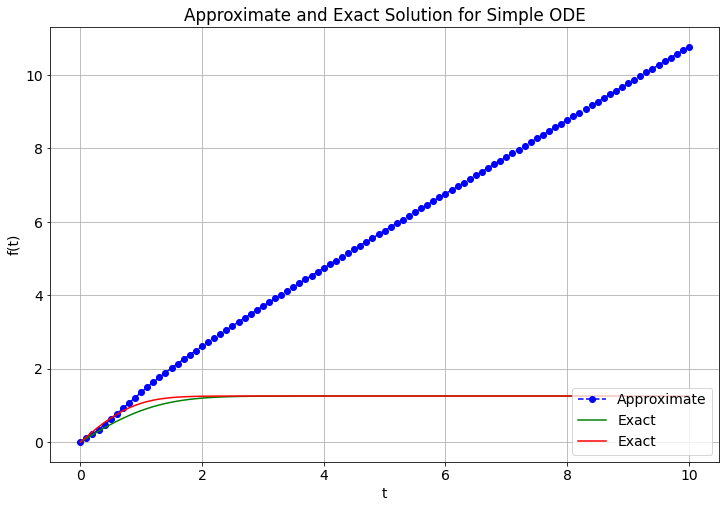

In [18]:
t = np.arange(0, xn+h, h) # Numerical grid

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

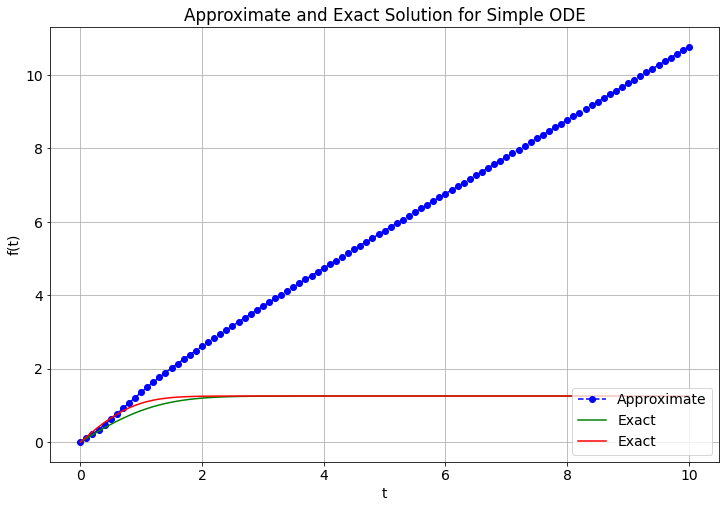

In [19]:
t = np.arange(0, xn+h, h) # Numerical grid

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

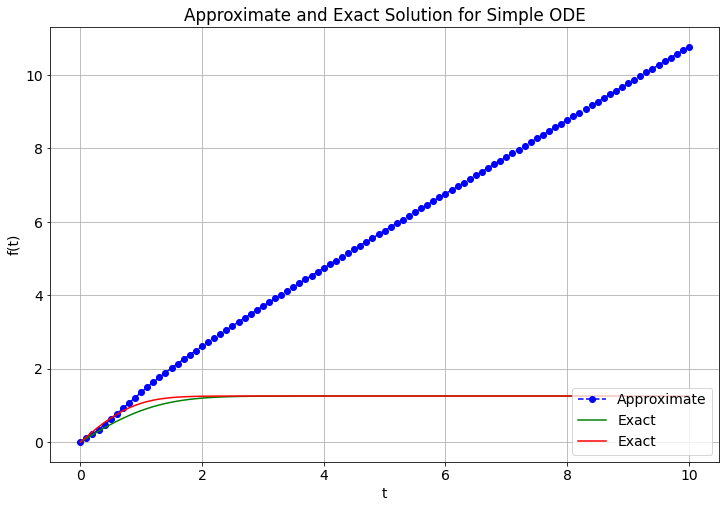

In [20]:
t = np.arange(0, xn+h, h) # Numerical grid

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [21]:
def x_T(t):
    return np.sqrt(np.pi/2)*scipy.special.erf(t)
def s_func(t):
    return 
def first(t, s):
    x_t = x_T(t)
    return (x_t - s)**2
def second(t):
    return u(t)**2

def cost(w_p, w_e, s, times):
    return w_p*1/2*scipy.integrate.simps(first(times, s), times)+w_e*1/2*quad(second,times[0],times[-1])[0]

In [9]:
import scipy
x_t= x_T(t)
x_t

array([0.        , 0.14095136, 0.2791163 , 0.41187256, 0.53691019,
       0.65234986, 0.75682138, 0.84949782, 0.93008563, 0.99877633,
       1.05616882, 1.10317346, 1.14090938, 1.17060536, 1.1935124 ,
       1.21083324, 1.22367123, 1.23299849, 1.23964111, 1.24427828,
       1.24745147, 1.24957993, 1.25097941, 1.25188138, 1.25245121,
       1.2528041 , 1.25301831, 1.25314578, 1.25322012, 1.25326263,
       1.25328645, 1.25329954, 1.25330659, 1.25331031, 1.25331223,
       1.25331321, 1.25331369, 1.25331393, 1.25331404, 1.25331409,
       1.25331412, 1.25331413, 1.25331413, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331414,
       1.25331414, 1.25331414, 1.25331414, 1.25331414, 1.25331

In [10]:

scipy.integrate.simps(first(times), times)
plt.plot(times, first(times))
plt.grid()
plt.show()

TypeError: first() missing 1 required positional argument: 's'

In [ ]:
cost(1,0,times)

In [8]:
def f(t):
    return np.exp(t)-1

quad(f, 0, 1)

(0.7182818284590453, 7.974530241250892e-15)

In [7]:
def u(t):
    return t**2/np.exp(t)
h, s = euler(x0,y0,xn,step)
times = np.arange(0, xn+h, h)

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

cost(1,0,times)

TypeError: euler() missing 1 required positional argument: 'n'

In [11]:
def u(t):
    return 0
step = 50
h, s = euler(x0,y0,xn,step)
times = np.arange(0, xn+h, h)
t = times

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

cost(1,0,times)

TypeError: euler() missing 1 required positional argument: 'n'

In [12]:
def u(t):
    return 0
step = 100
h, s = euler(x0,y0,xn,step)
times = np.arange(0, xn+h, h)
t = times


plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

cost(1,0,times)

TypeError: euler() missing 1 required positional argument: 'n'


-----------SOLUTION-----------
------------------------------
x0	y0	slope	yn
------------------------------

At x=4.0000, y=1.2632


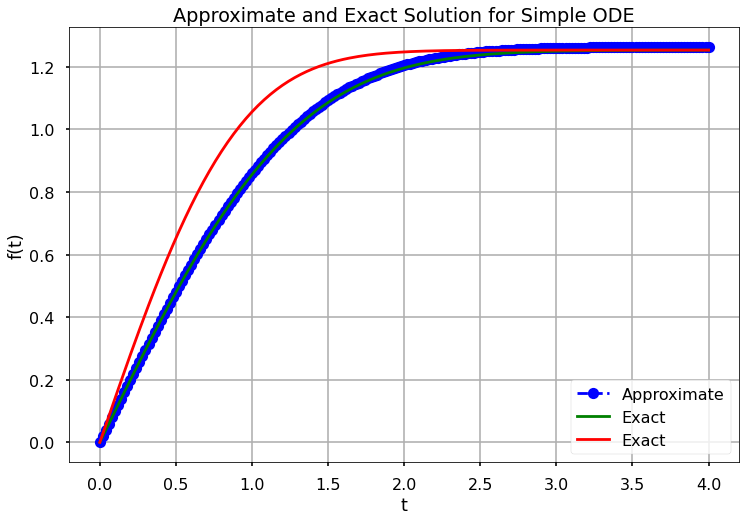

0.02099989047411508

In [132]:
def u(t):
    return 0
step = 200
h, s = euler(x0,y0,xn,step)
times = np.arange(0, xn+h, h)
t = times


plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2)), 'g', label='Exact')
plt.plot(t, np.sqrt(np.pi/2)*scipy.special.erf(t), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

cost(1,0,times)

In [118]:
cost(1,0,times)

1.437491695440415

In [192]:
from sympy import symbols, cos, diff, Symbol, lambdify, sympify

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b
func = (diff(f, a))


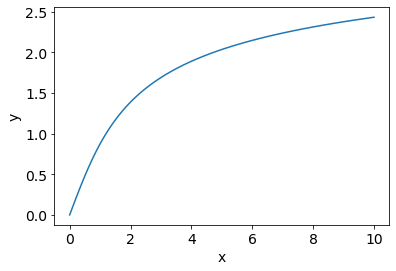

In [16]:
from scipy.integrate import odeint

# Define a function which calculates the derivative



ts = np.linspace(0,10,100)
x0 = 0  # the initial condition
xs = odeint(f, x0, ts)
xs = np.array(xs).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(ts, xs);

In [261]:
def f(x):
    return x

func = f(Symbol('x'))
d_f_x = diff(func, Symbol('x'))
print(d_f_x)

1


In [190]:
f=lambdify(Symbol('x'), test2)
f(6)

2

In [285]:
h = "x_dot(t)**2-b*x(t)"
sympify(h)

-b*x(t) + x_dot(t)**2

In [286]:
d_h_x_dot = diff(sympify(h), sympify('x_dot(t)'))
d_h_x_dot

2*x_dot(t)

In [279]:
d_t = diff(d_h_x_dot, sympify('t'))
d_t

0

In [307]:
d_h_x_dot2 = d_h_x_dot.subs(sympify('x_dot(t)'), sympify('b*x(t)'))
d_h_x_dot2

2*b*x(t)

In [309]:
diff(d_h_x_dot2, sympify('t'))

2*b*Derivative(x(t), t)

In [281]:
d_h_x = diff(sympify(h), sympify('x'))
d_h_x

-b

In [302]:
def x_dot(t):
    return -b*x(t)
x_0 = a
x_dot = lambda t:-b*x_0
test = lambdify(symbols('t, x_dot'), d_h_x_dot)
test(0, x_dot)

-2*a*b

In [ ]:
f=lambdify(Symbol('x'), d_f_x)+lam*(d_h_x - d_t)-lam_dot*d_h_x_dot

In [22]:
def lambda_def(x,x_T, w_p, lambd, t):
    return w_p*(x[t]-x_T[t])+lambd[t]*x[t]*np.exp((-x[t]**2)/2)

# Euler method
def euler_backwards(x,x_T,w_p,lambd, step,n):

    for i in range(n-2,-1,-1):
        lambd[i] = lambd[i+1]+step*lambda_def(x,x_T, w_p, lambd, i)

    return lambd


In [ ]:
from scipy.integrate import odeint

# Define a function which calculates the derivative



ts = np.linspace(0,10,100)
x0 = 0  # the initial condition
xs = odeint(f, x0, ts)
xs = np.array(xs).flatten()

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(ts, xs);

In [ ]:
t = np.arange(0, xn+h, h)
plt.figure(figsize = (12, 8))
plt.plot(times, s, 'bo--', label='euler')
#plt.plot(times[:-1], xs, 'ro--', label='odeint')
#np.sqrt(np.pi/2)*scipy.special.erf(t/np.sqrt(2))
#np.sqrt(np.pi/2)*scipy.special.erf(t)
plt.plot(times, x_T(times), 'g', label='Exact')
#plt.plot(t, 1 / (1 + np.exp(-t*100)), 'r', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

